In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv("exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,some high school,free/reduced,none,62,70,72
1,male,group B,master's degree,free/reduced,none,70,70,64
2,male,group A,associate's degree,standard,none,72,61,62
3,female,group B,some college,standard,none,64,71,69
4,male,group C,some college,standard,completed,75,76,72


In [48]:
df.shape

(1000, 8)

In [49]:
## check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [50]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [51]:
## check dublicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [52]:
df.duplicated().sum()

2

In [44]:
## remove the duplicate value
df.drop_duplicates(inplace = True)

In [53]:
df.shape

(1000, 8)

In [54]:
## check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [55]:
## checking the number of uniques value of each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     77
reading score                  71
writing score                  75
dtype: int64

In [56]:
## chech the statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.00000,1000.000000
mean,67.139000,70.13900,68.859000
std,14.769828,14.22716,14.786269
min,7.000000,19.00000,21.000000
25%,58.000000,61.00000,59.750000
50%,67.000000,70.00000,69.000000
75%,77.000000,80.00000,79.000000
max,100.000000,100.00000,100.000000


In [57]:
## explore more info about data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,some high school,free/reduced,none,62,70,72
1,male,group B,master's degree,free/reduced,none,70,70,64
2,male,group A,associate's degree,standard,none,72,61,62
3,female,group B,some college,standard,none,64,71,69
4,male,group C,some college,standard,completed,75,76,72


In [58]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,some high school,standard,completed,70,71,73
996,female,group E,master's degree,standard,completed,83,95,93
997,male,group B,some college,standard,none,78,77,69
998,female,group D,associate's degree,free/reduced,none,66,63,71
999,female,group C,some college,standard,completed,83,93,98


In [59]:
[feature for feature in df.columns]

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [60]:
[feature for feature in df.columns if df[feature].dtype != 'O']

['math score', 'reading score', 'writing score']

In [61]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [62]:
numerical_features

['math score', 'reading score', 'writing score']

In [63]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [64]:
df['gender'].value_counts()

male      532
female    468
Name: gender, dtype: int64

In [65]:
df['race/ethnicity'].value_counts()

group C    338
group D    256
group B    214
group E    106
group A     86
Name: race/ethnicity, dtype: int64

In [66]:
## Aggregate the total score with mean
df['total_score'] = (df['math score']) + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group E,some high school,free/reduced,none,62,70,72,204,68.000000
1,male,group B,master's degree,free/reduced,none,70,70,64,204,68.000000
2,male,group A,associate's degree,standard,none,72,61,62,195,65.000000
3,female,group B,some college,standard,none,64,71,69,204,68.000000
4,male,group C,some college,standard,completed,75,76,72,223,74.333333


<Axes: xlabel='average', ylabel='Count'>

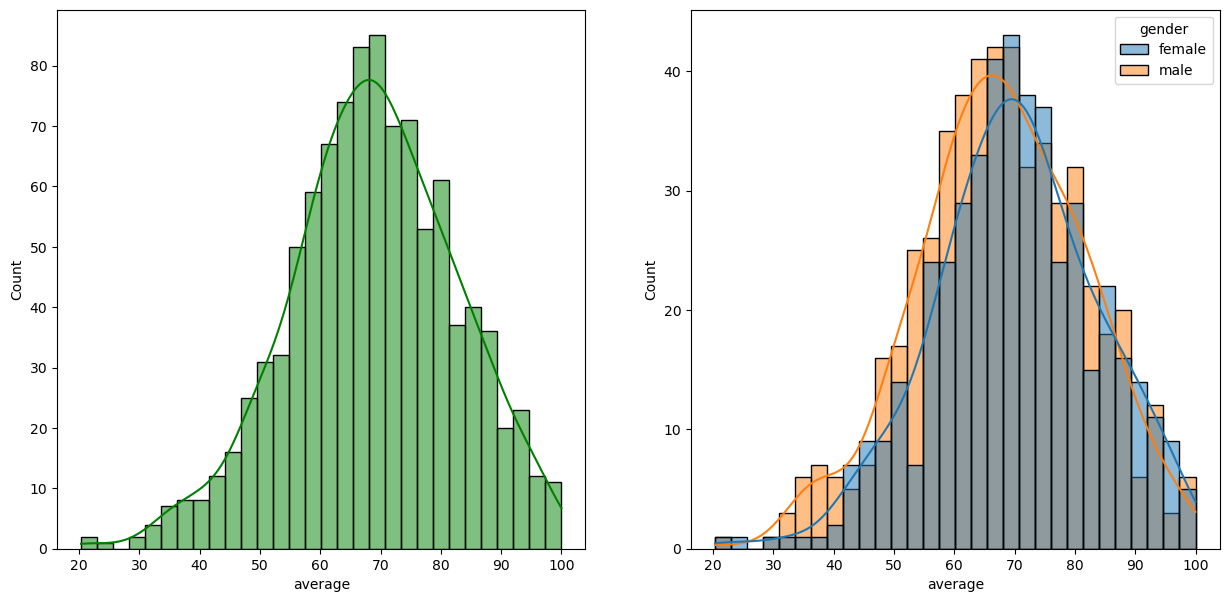

In [67]:
## Exploring more visualization
fig,axis = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df,x = 'average',bins = 30,kde = True,color = 'g')
plt.subplot(122)
sns.histplot(data = df,x = 'average',bins = 30,kde = True,hue = 'gender')

## Insites


<Axes: xlabel='average', ylabel='Count'>

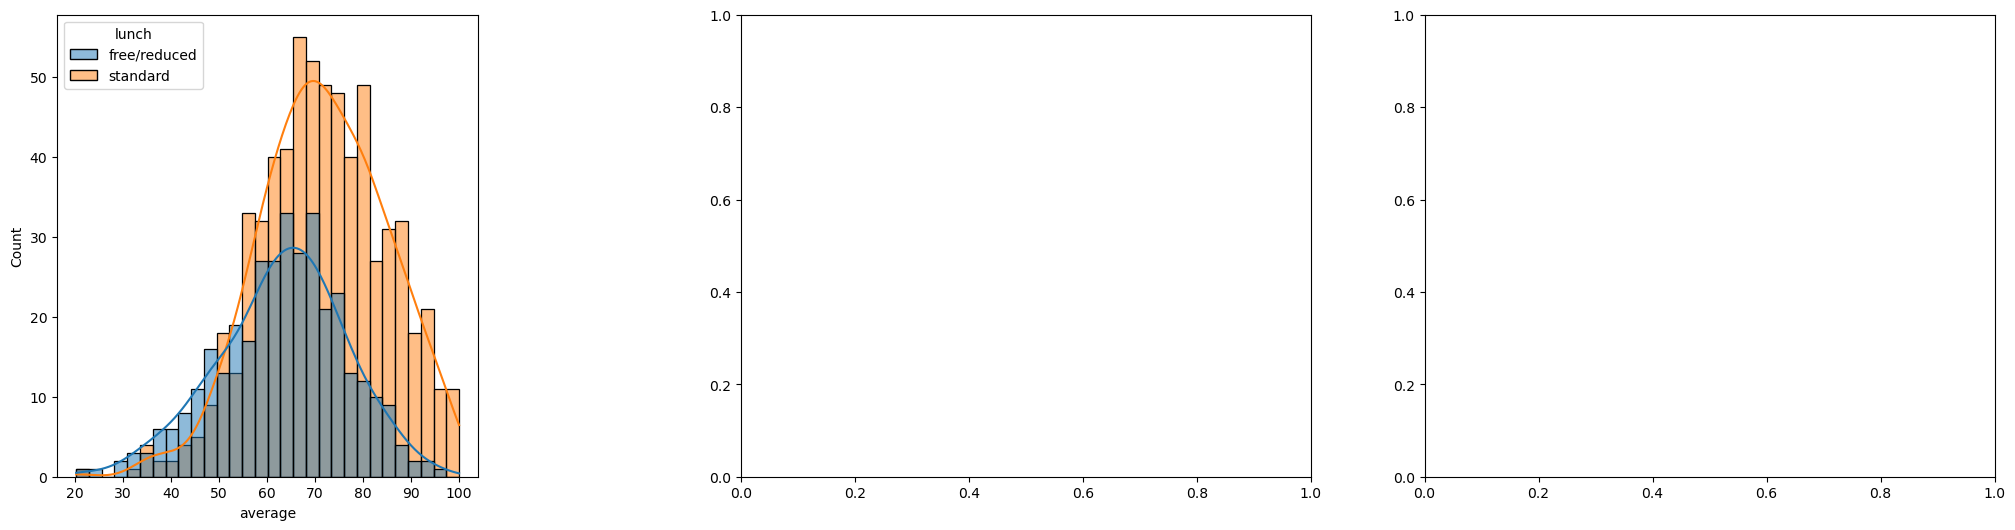

In [68]:
## female student tend to perform well then male student
fig,axis = plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df,x = 'average',bins = 30,kde = True,hue = 'lunch')

<Axes: xlabel='average', ylabel='Count'>

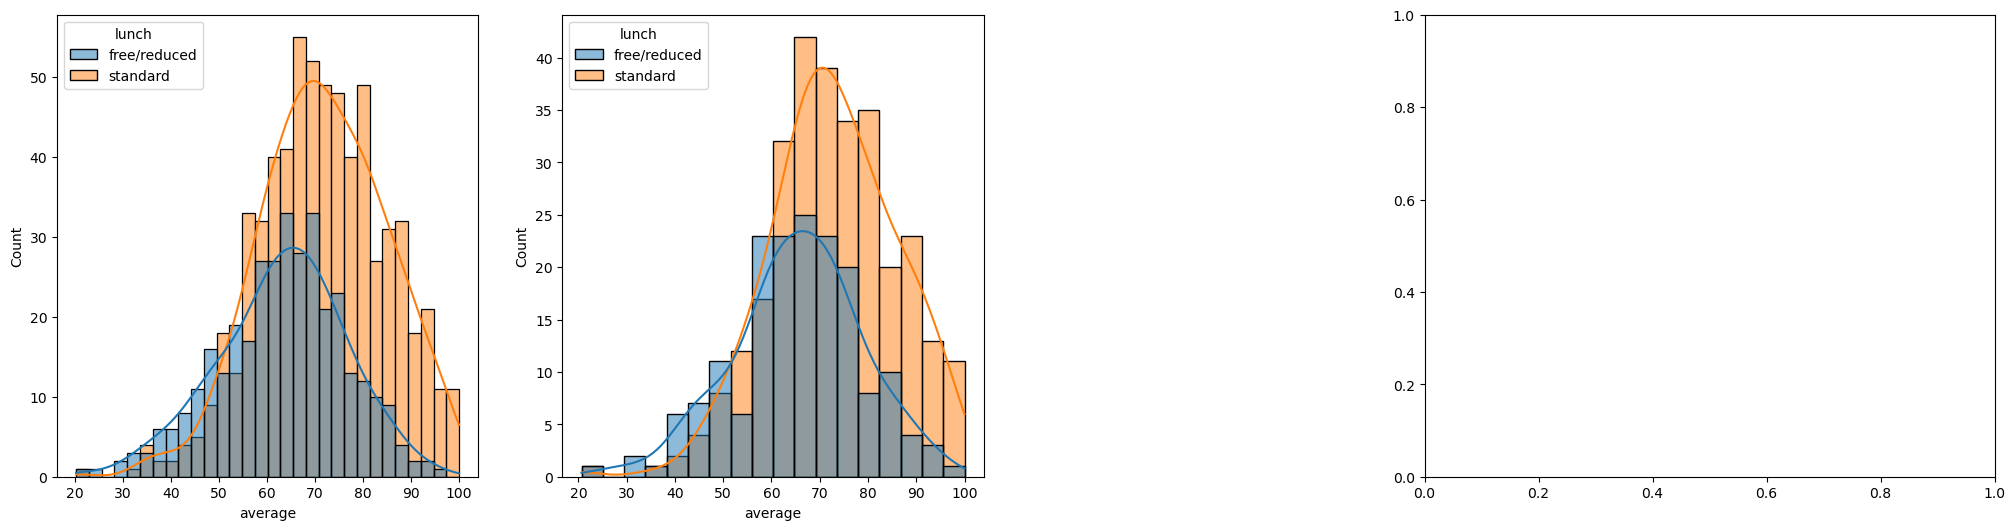

In [69]:
## female student tend to perform well then male student
fig,axis = plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df,x = 'average',bins = 30,kde = True,hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'],x = 'average',kde = True,hue = 'lunch')

<Axes: xlabel='average', ylabel='Count'>

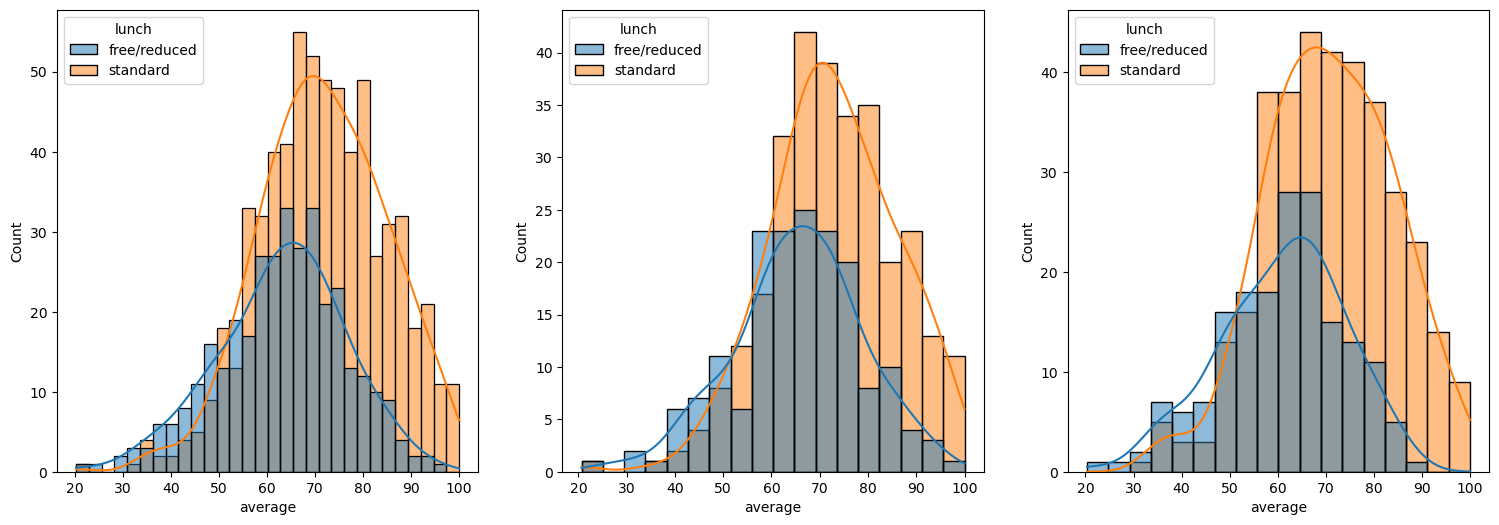

In [70]:
fig,axis = plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df,x = 'average',bins = 30,kde = True,hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'],x = 'average',kde = True,hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'],x = 'average',kde = True,hue = 'lunch')

In [71]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group E,some high school,free/reduced,none,62,70,72,204,68.000000
1,male,group B,master's degree,free/reduced,none,70,70,64,204,68.000000
2,male,group A,associate's degree,standard,none,72,61,62,195,65.000000
3,female,group B,some college,standard,none,64,71,69,204,68.000000
4,male,group C,some college,standard,completed,75,76,72,223,74.333333


<Axes: xlabel='average', ylabel='Count'>

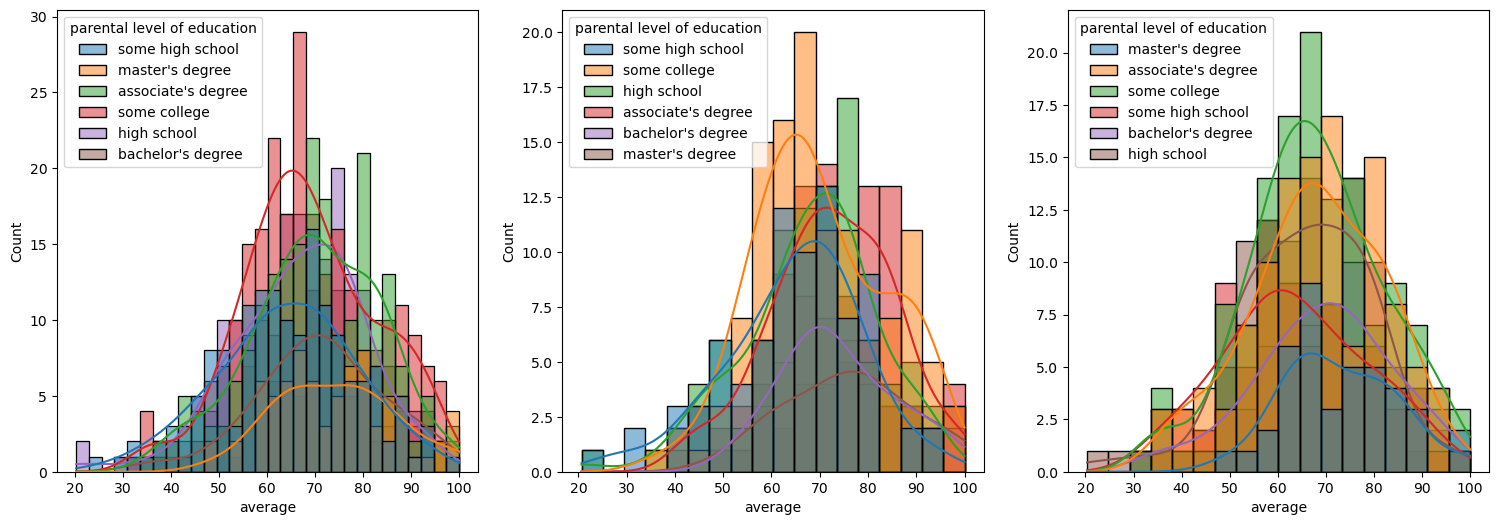

In [72]:
fig,axis = plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df,x = 'average',bins = 30,kde = True,hue = 'parental level of education')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'],x = 'average',kde = True,hue = 'parental level of education')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'],x = 'average',kde = True,hue = 'parental level of education')

<Axes: xlabel='average', ylabel='Count'>

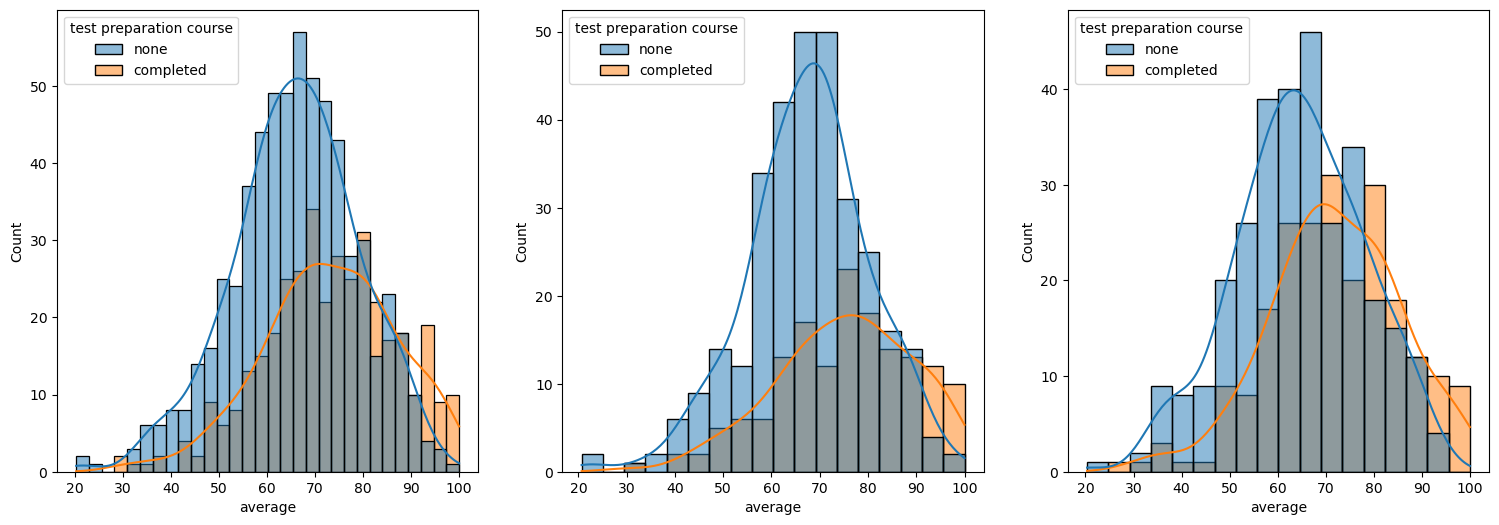

In [73]:
fig,axis = plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df,x = 'average',bins = 30,kde = True,hue = 'test preparation course')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'],x = 'average',kde = True,hue = 'test preparation course')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'],x = 'average',kde = True,hue = 'test preparation course')

<Axes: xlabel='average', ylabel='Count'>

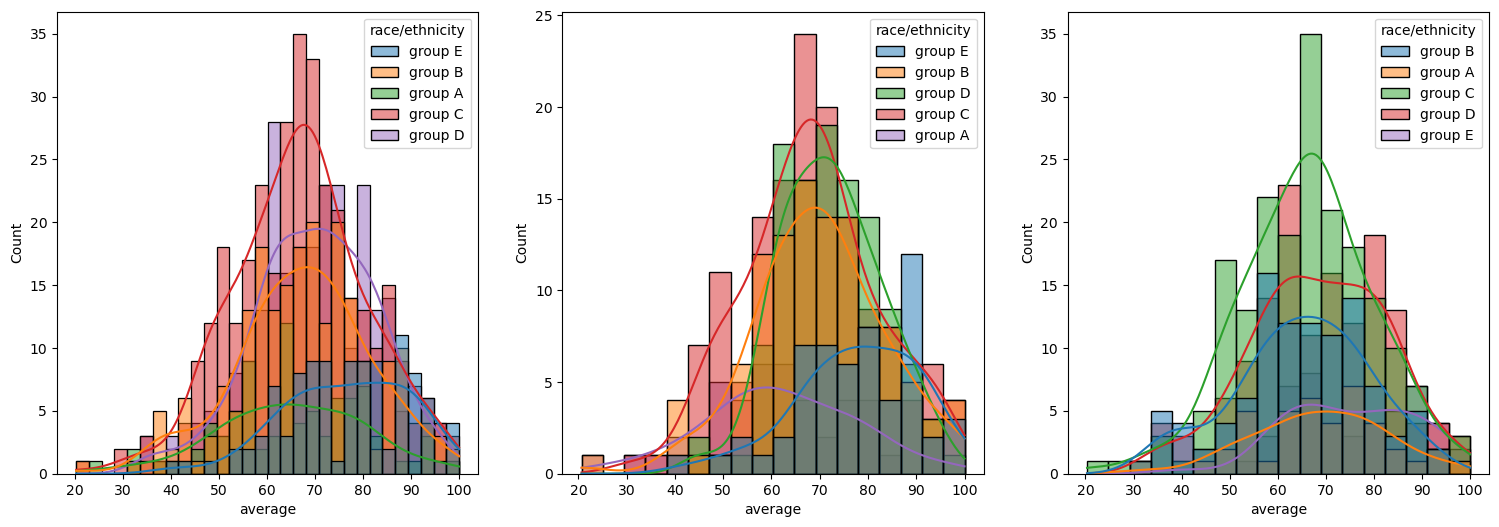

In [74]:
fig,axis = plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df,x = 'average',bins = 30,kde = True,hue = 'race/ethnicity')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'],x = 'average',kde = True,hue = 'race/ethnicity')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'],x = 'average',kde = True,hue = 'race/ethnicity')

<Axes: >

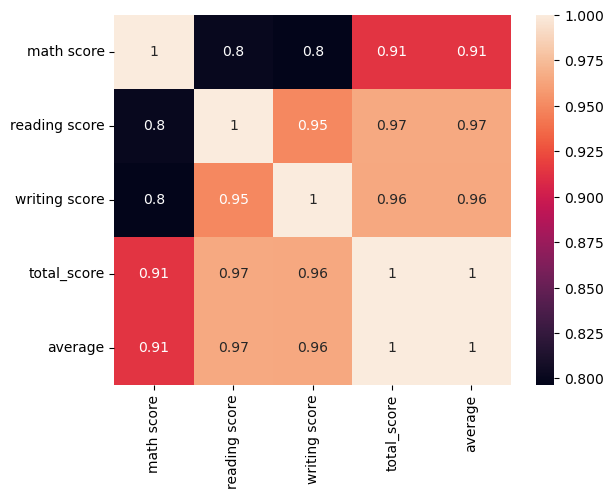

In [75]:
sns.heatmap(df.corr(),annot = True)